In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
data=np.load("/content/drive/MyDrive/Colab Notebooks/miniDimenReduction/data.npy", mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [6]:
data.shape

(1280, 3960)

In [7]:
labels=np.load("/content/drive/MyDrive/Colab Notebooks/miniDimenReduction/labels.npy", mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [8]:
labels.shape

(1280, 4)

# Classification into low or high valence by taking median as threshold

In [ ]:
labels[:,0]

array([7.71, 8.1 , 8.58, ..., 3.05, 3.99, 7.15])

In [ ]:
V_Y=labels[:,0]

In [ ]:
V_Y=V_Y>5
V_Y=V_Y.astype(int)
V_Y

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
Y=np.concatenate((((V_Y==0).astype(int)).reshape((-1,1)),((V_Y==1).astype(int)).reshape((-1,1))),axis=1)

In [ ]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


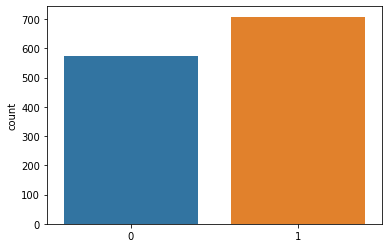

In [ ]:
sns.countplot(V_Y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
data=ss.fit_transform(X=data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,V_Y,test_size=0.1,random_state=42)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [ ]:
X_train.shape,y_train.shape

((1036, 3960), (1036,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [ ]:
model = Sequential()
model.add(Dense(5000, input_dim=3960, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 5000)              19805000  
_________________________________________________________________
dropout_38 (Dropout)         (None, 5000)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 500)               2500500   
_________________________________________________________________
dropout_39 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dropout_40 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)               

In [ ]:
history=model.fit(X_train, y_train, epochs=200, batch_size=300,validation_data=(X_val,y_val))

Epoch 1/200
4/4 [==============================] - 0s 30ms/step - loss: 1264369.8750 - accuracy: 0.5685 - val_loss: 2065051.8750 - val_accuracy: 0.5086
Epoch 2/200
4/4 [==============================] - 0s 24ms/step - loss: 2694425.7500 - accuracy: 0.5376 - val_loss: 2106547.0000 - val_accuracy: 0.5259
Epoch 3/200
4/4 [==============================] - 0s 24ms/step - loss: 1661063.6250 - accuracy: 0.5782 - val_loss: 2064066.2500 - val_accuracy: 0.5259
Epoch 4/200
4/4 [==============================] - 0s 20ms/step - loss: 1708754.7500 - accuracy: 0.5338 - val_loss: 2061776.5000 - val_accuracy: 0.5259
Epoch 5/200
4/4 [==============================] - 0s 20ms/step - loss: 1247241.8750 - accuracy: 0.5550 - val_loss: 1943667.2500 - val_accuracy: 0.5345
Epoch 6/200
4/4 [==============================] - 0s 20ms/step - loss: 1687798.8750 - accuracy: 0.5492 - val_loss: 2040553.7500 - val_accuracy: 0.5345
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 1569622.0000 - a

In [ ]:
model.evaluate(X_train,y_train)

33/33 [==============================] - 0s 3ms/step - loss: 32676.8926 - accuracy: 0.6863


[32676.892578125, 0.6862934231758118]

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2282287.5000 - accuracy: 0.5547


[2282287.5, 0.5546875]

In [ ]:
model.evaluate(data,V_Y)

40/40 [==============================] - 0s 2ms/step - loss: 397596.5312 - accuracy: 0.6562


[397596.53125, 0.65625]

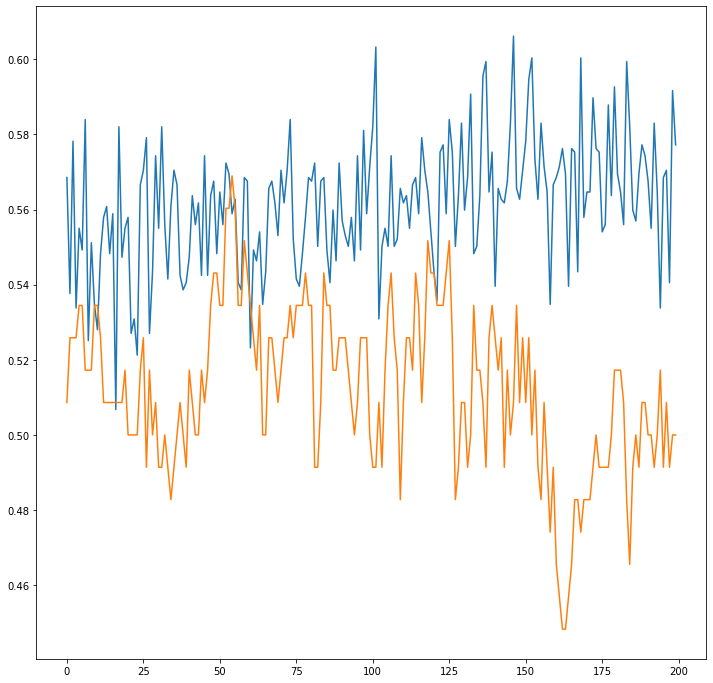

In [ ]:
plt.figure(figsize=(12,12))
plt.plot([x for x in range(len(history.history['val_accuracy']))],history.history['accuracy'])
plt.plot([x for x in range(len(history.history['val_accuracy']))],history.history['val_accuracy'])
plt.show()

# Arousal

In [48]:
labels[:,1]

array([7.6 , 7.31, 7.54, ..., 7.01, 7.17, 4.03])

In [49]:
V_Y=labels[:,1]

In [50]:
V_Y=V_Y>5
V_Y=V_Y.astype(int)
V_Y

array([1, 1, 1, ..., 1, 1, 0])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


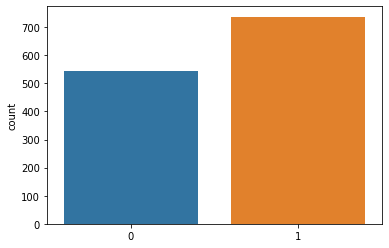

In [51]:
sns.countplot(V_Y)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(data,V_Y,test_size=0.20,random_state=42)

In [73]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [74]:
X_train.shape,y_train.shape

((921, 3960), (921,))

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [76]:
model = Sequential()
model.add(Dense(5000, input_dim=3960, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [77]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


In [78]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 5000)              19805000  
_________________________________________________________________
dropout_9 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               2500500   
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [80]:
history=model.fit(X_train, y_train, epochs=250, batch_size=300,validation_data=(X_val,y_val))

Epoch 1/250
4/4 [==============================] - 0s 56ms/step - loss: 11178575.0000 - accuracy: 0.4864 - val_loss: 765301.0625 - val_accuracy: 0.5922
Epoch 2/250
4/4 [==============================] - 0s 24ms/step - loss: 5077860.0000 - accuracy: 0.5407 - val_loss: 348123.4062 - val_accuracy: 0.6117
Epoch 3/250
4/4 [==============================] - 0s 23ms/step - loss: 4893499.0000 - accuracy: 0.5309 - val_loss: 268305.8125 - val_accuracy: 0.5631
Epoch 4/250
4/4 [==============================] - 0s 23ms/step - loss: 5594649.5000 - accuracy: 0.5277 - val_loss: 317872.7500 - val_accuracy: 0.6117
Epoch 5/250
4/4 [==============================] - 0s 19ms/step - loss: 11021200.0000 - accuracy: 0.5559 - val_loss: 283911.4375 - val_accuracy: 0.6117
Epoch 6/250
4/4 [==============================] - 0s 18ms/step - loss: 5174676.5000 - accuracy: 0.5233 - val_loss: 265885.9375 - val_accuracy: 0.5922
Epoch 7/250
4/4 [==============================] - 0s 18ms/step - loss: 4657301.5000 - accur

In [81]:
model.evaluate(X_train,y_train)

29/29 [==============================] - 0s 2ms/step - loss: 13805.5068 - accuracy: 0.6124


[13805.5068359375, 0.6123778223991394]

In [82]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 2046223.8750 - accuracy: 0.5508


[2046223.875, 0.55078125]

In [83]:
model.evaluate(data,V_Y)

40/40 [==============================] - 0s 2ms/step - loss: 424714.2500 - accuracy: 0.6008


[424714.25, 0.600781261920929]

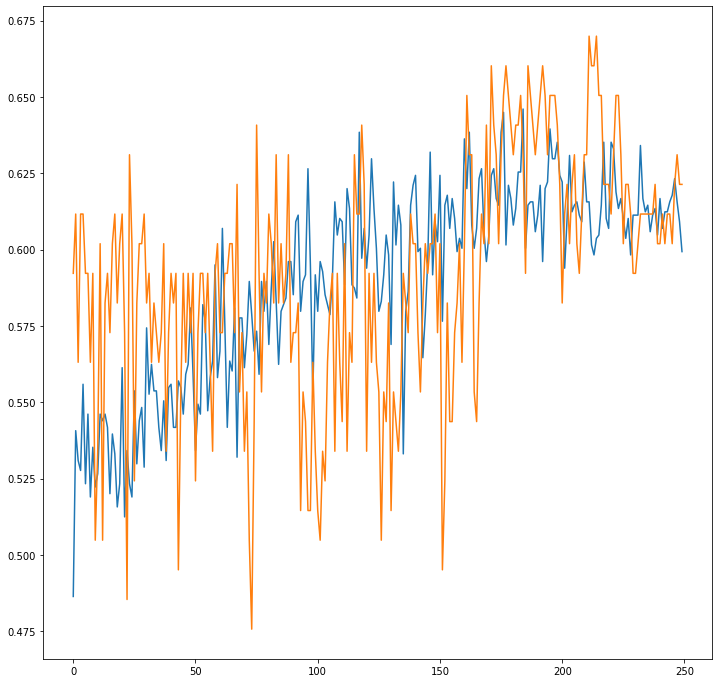

In [84]:
plt.figure(figsize=(12,12))
plt.plot([x for x in range(len(history.history['val_accuracy']))],history.history['accuracy'])
plt.plot([x for x in range(len(history.history['val_accuracy']))],history.history['val_accuracy'])
plt.show()